In [2]:
import warnings
import os
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torch.autograd import Variable
from torch.utils.data import random_split
from tqdm import tqdm
import sklearn.metrics

In [8]:
os.listdir('/floyd/input/leaf')

['Morus_Nigra',
 'Quercus_Agrifolia',
 'Quercus_Crassifolia',
 'Alnus_Sieboldiana',
 'Quercus_Trojana',
 'Viburnum_x_Rhytidophylloides',
 'Ginkgo_Biloba',
 'Quercus_Nigra',
 'Olea_Europaea',
 'Quercus_Dolicholepis',
 'Quercus_Cerris',
 'Quercus_Rhysophylla',
 'Quercus_Suber',
 'Populus_Nigra',
 'Quercus_Greggii',
 'Cytisus_Battandieri',
 'Alnus_Viridis',
 'Zelkova_Serrata',
 'Quercus_Semecarpifolia',
 'Liriodendron_Tulipifera',
 'Populus_Grandidentata',
 'Quercus_Castaneifolia',
 'Lithocarpus_Cleistocarpus',
 'Quercus_Palustris',
 'Salix_Intergra',
 'Acer_Pictum',
 'Eucalyptus_Urnigera',
 'Alnus_Rubra',
 'Tilia_Oliveri',
 'Quercus_Coccinea',
 'Quercus_x_Hispanica',
 'Cercis_Siliquastrum',
 '.DS_Store',
 'Populus_Adenopoda',
 'Acer_Platanoids',
 'Quercus_Ilex',
 'Castanea_Sativa',
 'Quercus_Infectoria_sub',
 'Ulmus_Bergmanniana',
 'Acer_Capillipes',
 'Quercus_Pubescens',
 'Betula_Pendula',
 'Quercus_Vulcanica',
 'Quercus_Phillyraeoides',
 'Celtis_Koraiensis',
 'Ilex_Aquifolium',
 'Acer_

In [4]:
model = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
46827520it [00:03, 14077271.74it/s]


In [5]:
torch.manual_seed(41)

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
root = '/floyd/input/leaf'

In [25]:
transform_pre = transforms.Compose([
    transforms.Grayscale(3),
    transforms.Resize((200,200)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
])

In [26]:
dataset = datasets.ImageFolder(root,transform=transform_pre)

In [27]:
train,test = random_split(dataset,[790,200])

In [28]:
trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True,drop_last=True )
testloader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False,drop_last=True )

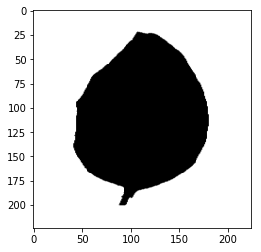

In [29]:
for inputs,outpus in trainloader:
    #slice out one channel
    image = inputs[0][0]
    plt.imshow(image.numpy(),cmap=plt.get_cmap('binary'))
    break

In [30]:
model.fc = torch.nn.Linear(model.fc.in_features, 99)

In [31]:
model.fc

Linear(in_features=512, out_features=99, bias=True)

In [32]:
if torch.cuda.is_available():
    device=torch.device('cuda')
else:
    device = torch.device('cpu')

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [33]:
torch.cuda.is_available()

True

In [34]:
model.to(device)
model.train()
for epoch in range(17):
    for inputs, outputs in tqdm(trainloader):
        inputs = inputs.to(device, non_blocking=True)
        outputs = outputs.to(device, non_blocking=True)
        optimizer.zero_grad()
        results = model(inputs)
        loss = loss_function(results, outputs)
        loss.backward()
        optimizer.step()
    print('Last loss: {0}'.format(loss),'with epoch',epoch+1)

  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 2.672185182571411 with epoch 0


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 1.0323450565338135 with epoch 1


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.4353121519088745 with epoch 2


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.14042454957962036 with epoch 3


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.08694776147603989 with epoch 4


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.06481599807739258 with epoch 5


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.027208715677261353 with epoch 6


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.03034452348947525 with epoch 7


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.012760959565639496 with epoch 8


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.015033036470413208 with epoch 9


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.008747190237045288 with epoch 10


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.006479881703853607 with epoch 11


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.004027359187602997 with epoch 12


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.0037316828966140747 with epoch 13


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.002673804759979248 with epoch 14


  0%|          | 0/12 [00:00<?, ?it/s]

Last loss: 0.0028856322169303894 with epoch 15


100%|██████████| 12/12 [00:08<00:00,  1.36it/s]


Last loss: 0.0020058751106262207 with epoch 16


In [35]:
results_buffer = []
actual_buffer = []
with torch.no_grad():
    model.eval()
    for inputs,actual in testloader:
        inputs = inputs.to(device, non_blocking=True)
        results = model(inputs).argmax(dim=1).to('cpu').numpy()
        results_buffer.append(results)
        actual_buffer.append(actual)
        
        
print(sklearn.metrics.classification_report(np.concatenate(actual_buffer),np.concatenate(results_buffer)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         1
          18       1.00    

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [1]:
class_label = dataset.classes

NameError: name 'dataset' is not defined

In [41]:

# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(99))
class_total = list(0. for i in range(99))
notrain=0

model.eval() # prep model for evaluation

for data, target in testloader:
    # forward pass: compute predicted outputs by passing inputs to the model
    data = data.to(device, non_blocking=True)
    target = target.to(device, non_blocking=True)
    output = model(data)
    # calculate the loss
    loss = loss_function(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(testloader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(99):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            class_label[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (class_label[i]))
        notrain +=1

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.252257

Test Accuracy of Acer_Opalus: 100% ( 2/ 2)
Test Accuracy of Pterocarya_Stenoptera: 100% ( 2/ 2)
Test Accuracy of Quercus_Hartwissiana: 100% ( 1/ 1)
Test Accuracy of Tilia_Tomentosa: 100% ( 3/ 3)
Test Accuracy of Quercus_Variabilis: 100% ( 3/ 3)
Test Accuracy of Magnolia_Salicifolia: 100% ( 1/ 1)
Test Accuracy of Quercus_Canariensis: N/A (no training examples)
Test Accuracy of Quercus_Rubra: 100% ( 3/ 3)
Test Accuracy of Quercus_Brantii: 100% ( 3/ 3)
Test Accuracy of Salix_Fragilis: 100% ( 1/ 1)
Test Accuracy of Zelkova_Serrata: 100% ( 3/ 3)
Test Accuracy of Betula_Austrosinensis: 100% ( 3/ 3)
Test Accuracy of Quercus_Pontica: N/A (no training examples)
Test Accuracy of Quercus_Afares: 100% ( 2/ 2)
Test Accuracy of Quercus_Coccifera: 100% ( 1/ 1)
Test Accuracy of Fagus_Sylvatica: 100% ( 2/ 2)
Test Accuracy of Phildelphus: 100% ( 2/ 2)
Test Accuracy of Acer_Palmatum: 100% ( 1/ 1)
Test Accuracy of Quercus_Pubescens: 100% ( 2/ 2)
Test Accuracy of Populus_Adenopoda: 100

In [ ]:
torch.save(mode.state_dict(), 'model.pt')
model.load_state_dict(torch.load('model.pt'))